In [32]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [33]:
datafile = "titanic.csv"
data = pd.read_csv(datafile)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
len(data),data.PassengerId.max()

(891, 891)

## Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


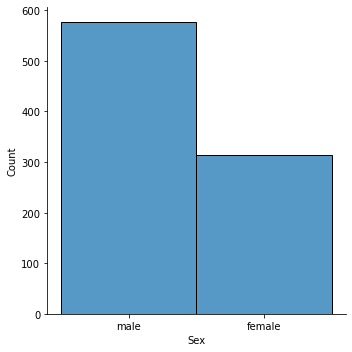

In [5]:
sns.displot(data=data,x='Sex');

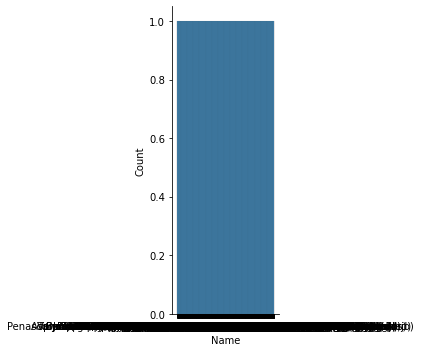

In [6]:
sns.displot(data=data,x='Name');

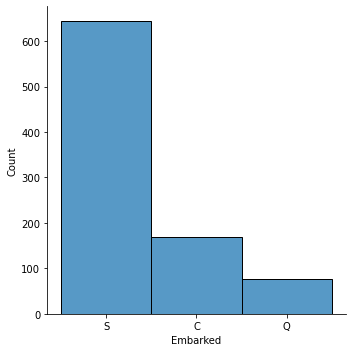

In [7]:
sns.displot(data=data,x='Embarked');

## Missing Data

In [35]:
data.count()

PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64

In [34]:
data=data.dropna()

## Feature Analysis

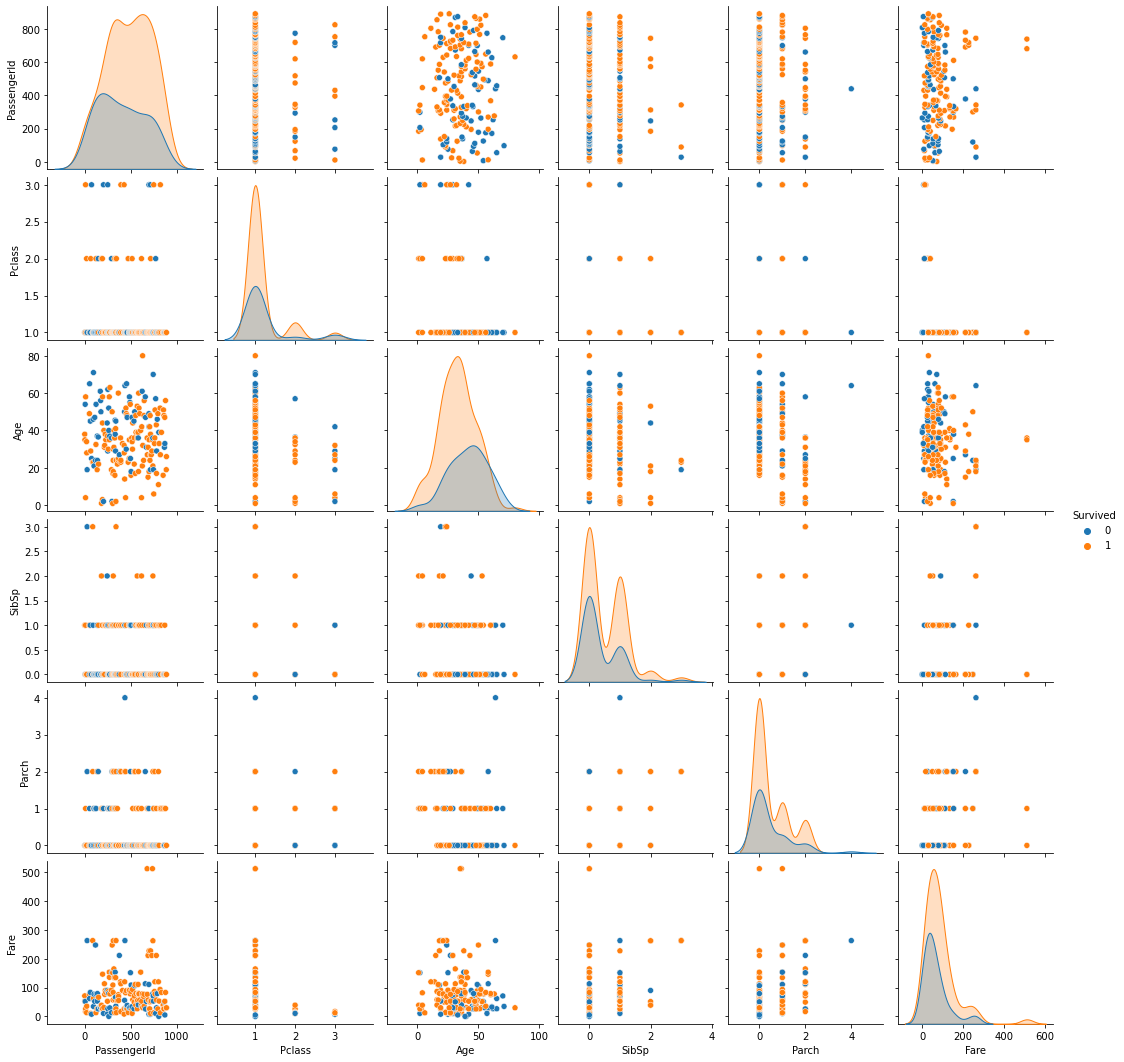

In [10]:
pair = sns.pairplot(data,hue='Survived')

## Feature Selection - Correlation Based

In [36]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


<AxesSubplot:>

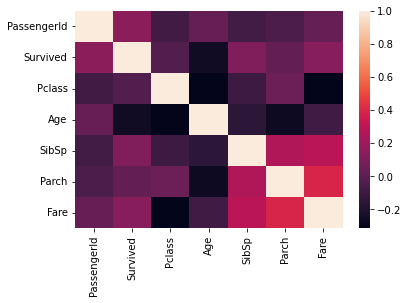

In [37]:
sns.heatmap(data.corr())

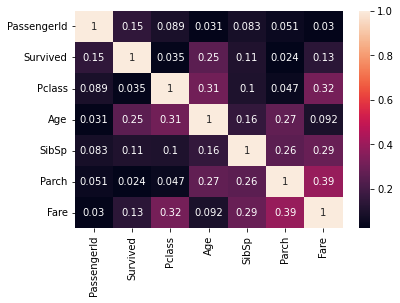

In [38]:
correlation=data.corr().abs()
sns.heatmap(correlation,vmin=correlation.min().min(),vmax=correlation.max().max(),annot=True);

## Feature Engineering

In [14]:
data['Gender']=data['Sex'].apply(lambda a: 1 if a=='male' else 0)

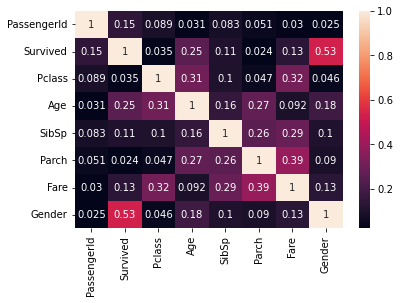

In [15]:
correlation=data.corr().abs()
sns.heatmap(correlation,vmin=correlation.min().min(),vmax=correlation.max().max(),annot=True);

## Eliminating String Values

In [39]:
data=data.drop(['PassengerId','Name','Cabin','Embarked','Ticket','Sex'],axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


## Data Segregation

In [40]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2)

In [41]:
train.size,test.size

(876, 222)

## Modelling

https://scikit-learn.org/stable/supervised_learning.html

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf=DecisionTreeClassifier()

X=train.drop(['Survived'],axis=1).values
y=train["Survived"].values

clf=clf.fit(X,y)

In [43]:
clf

DecisionTreeClassifier()

In [44]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [45]:
clf.feature_importances_

array([0.0209184 , 0.40116103, 0.04148817, 0.08569075, 0.45074166])

[Text(0.25, 0.9583333333333334, 'X[5] <= 0.5\ngini = 0.446\nsamples = 146\nvalue = [49, 97]'),
 Text(0.0761904761904762, 0.875, 'X[4] <= 10.481\ngini = 0.106\nsamples = 71\nvalue = [4, 67]'),
 Text(0.0380952380952381, 0.7916666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.11428571428571428, 0.7916666666666666, 'X[4] <= 29.356\ngini = 0.056\nsamples = 69\nvalue = [2, 67]'),
 Text(0.0761904761904762, 0.7083333333333334, 'X[1] <= 49.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.0380952380952381, 0.625, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.11428571428571428, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1523809523809524, 0.7083333333333334, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.4238095238095238, 0.875, 'X[1] <= 18.0\ngini = 0.48\nsamples = 75\nvalue = [45, 30]'),
 Text(0.38571428571428573, 0.7916666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.46190476190476193, 0.7916666666666666, 'X[4] <= 12.938\ng

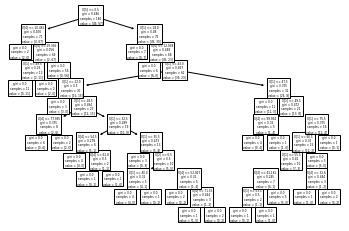

In [25]:
tree.plot_tree(clf)

In [46]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("titanic")

dot_data = tree.export_graphviz(clf, out_file=None,feature_names=data.columns[1:],class_names=['0','1'],filled=True, rounded=True,  special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

ModuleNotFoundError: No module named 'graphviz'

In [47]:
X_test=test.drop(['Survived'],axis=1).values
y_test=test["Survived"]

predictions = clf.predict(X_test)
predictions

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(test["Survived"], predictions)

0.40540540540540543

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf=clf.fit(X,y)

predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.6216216216216216

In [50]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### Create a classifier model for iris data

- Credit Card Fraud Detection Data: https://www.kaggle.com/datasets/ealaxi/banksim1